In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

In [2]:
plt.style.use('dark_background')
params = {'axes.labelsize': 20, 'xtick.labelsize':14, 'ytick.labelsize': 14, 'figure.figsize':[23, 23]}
plt.rcParams.update(params)

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train.shape

(8693, 14)

In [5]:
test.shape

(4277, 13)

In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [10]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [11]:
num_attr = [col_name for col_name, col_type in zip(train.columns, train.dtypes) if col_type != object]
cat_attr = [col_name for col_name, col_type in zip(train.columns, train.dtypes) if col_type == object]

(-10.0, 510.0)

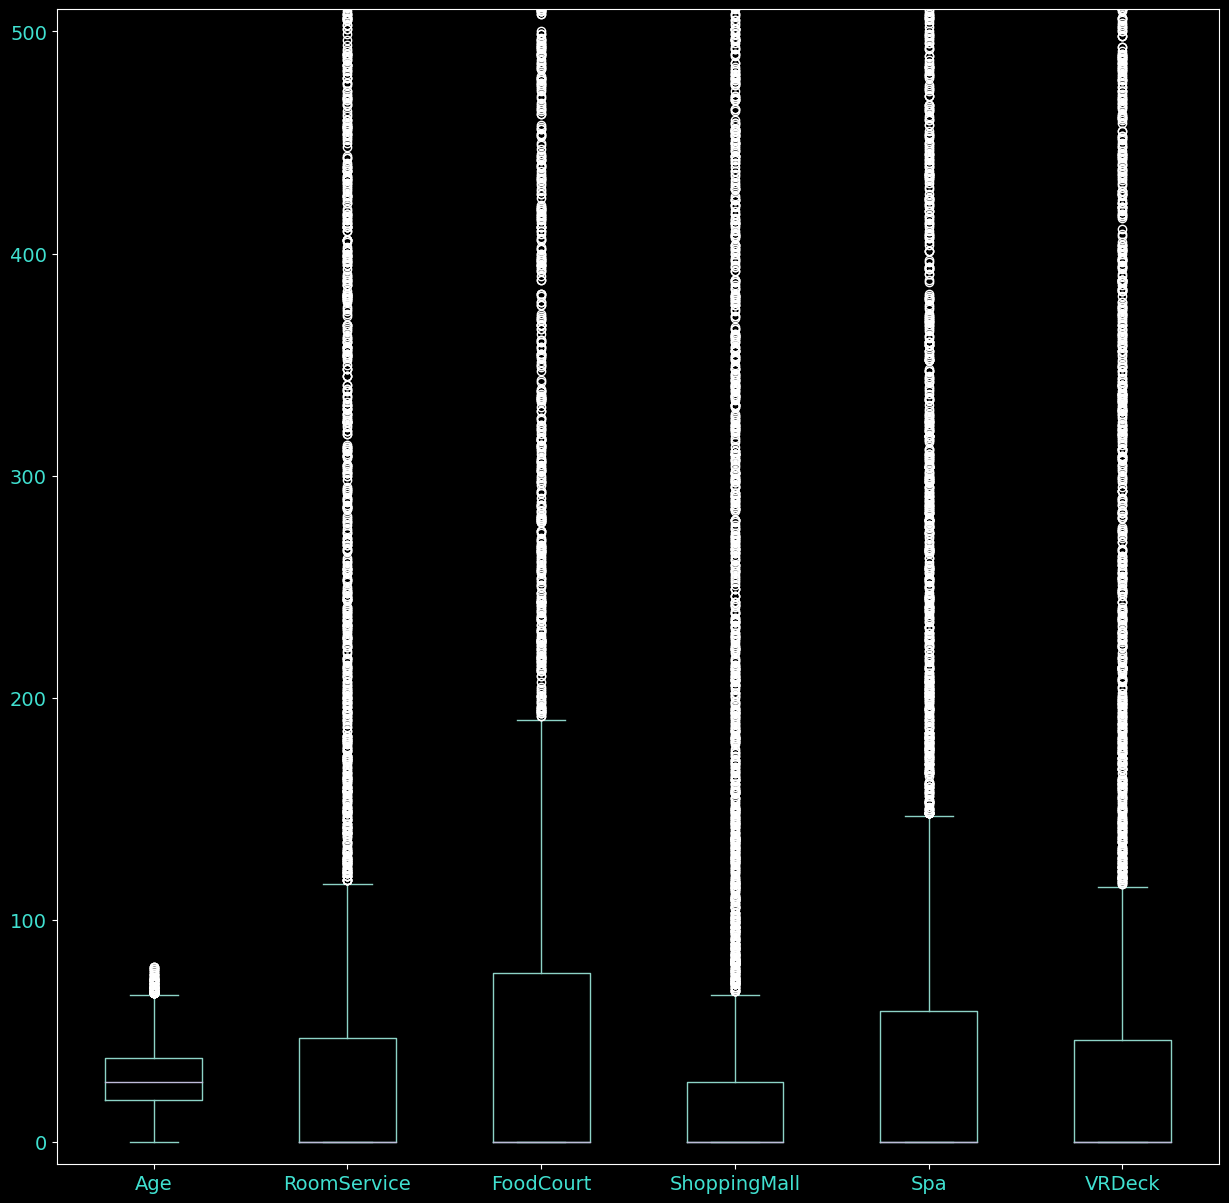

In [12]:
train[num_attr].plot(kind='box', figsize=(15, 15))
plt.xticks(color='#40E0D0')
plt.yticks(color='#40E0D0')
plt.ylim(-10, 510)

(-2.0, 10.0)

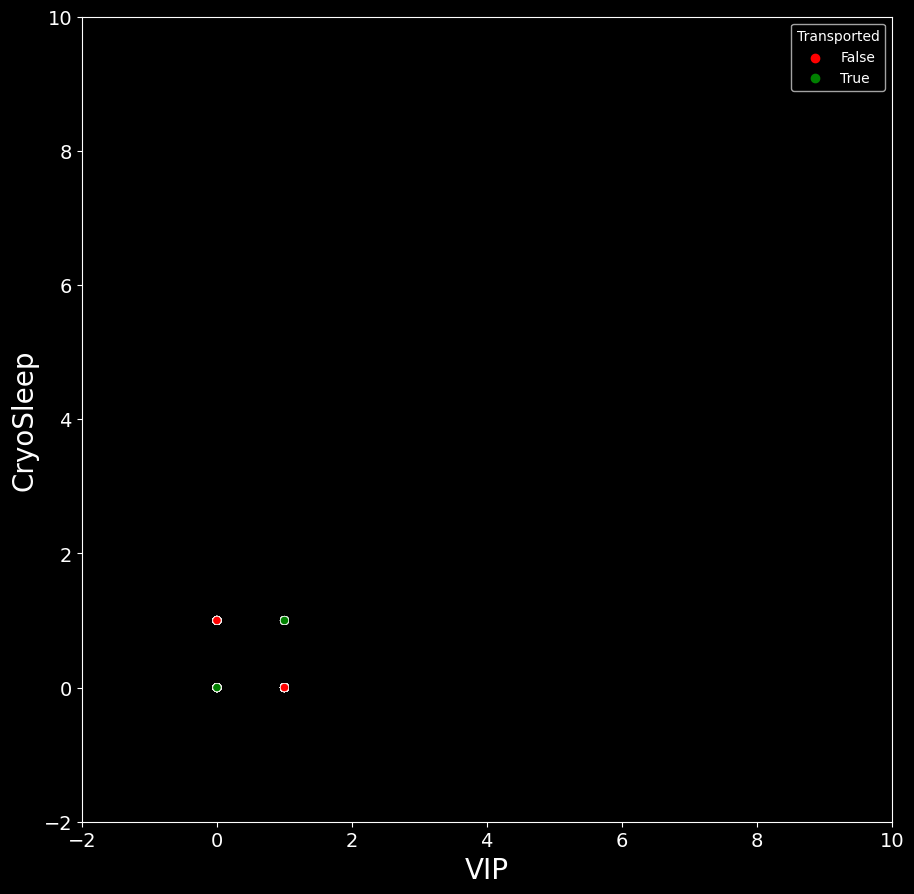

In [13]:
plt.subplot(224)
sns.scatterplot(data=train, x='VIP', y='CryoSleep', hue='Transported', palette=['red', 'green'])
plt.xlim(-2, 10)
plt.ylim(-2, 10)

(-10.0, 6000.0)

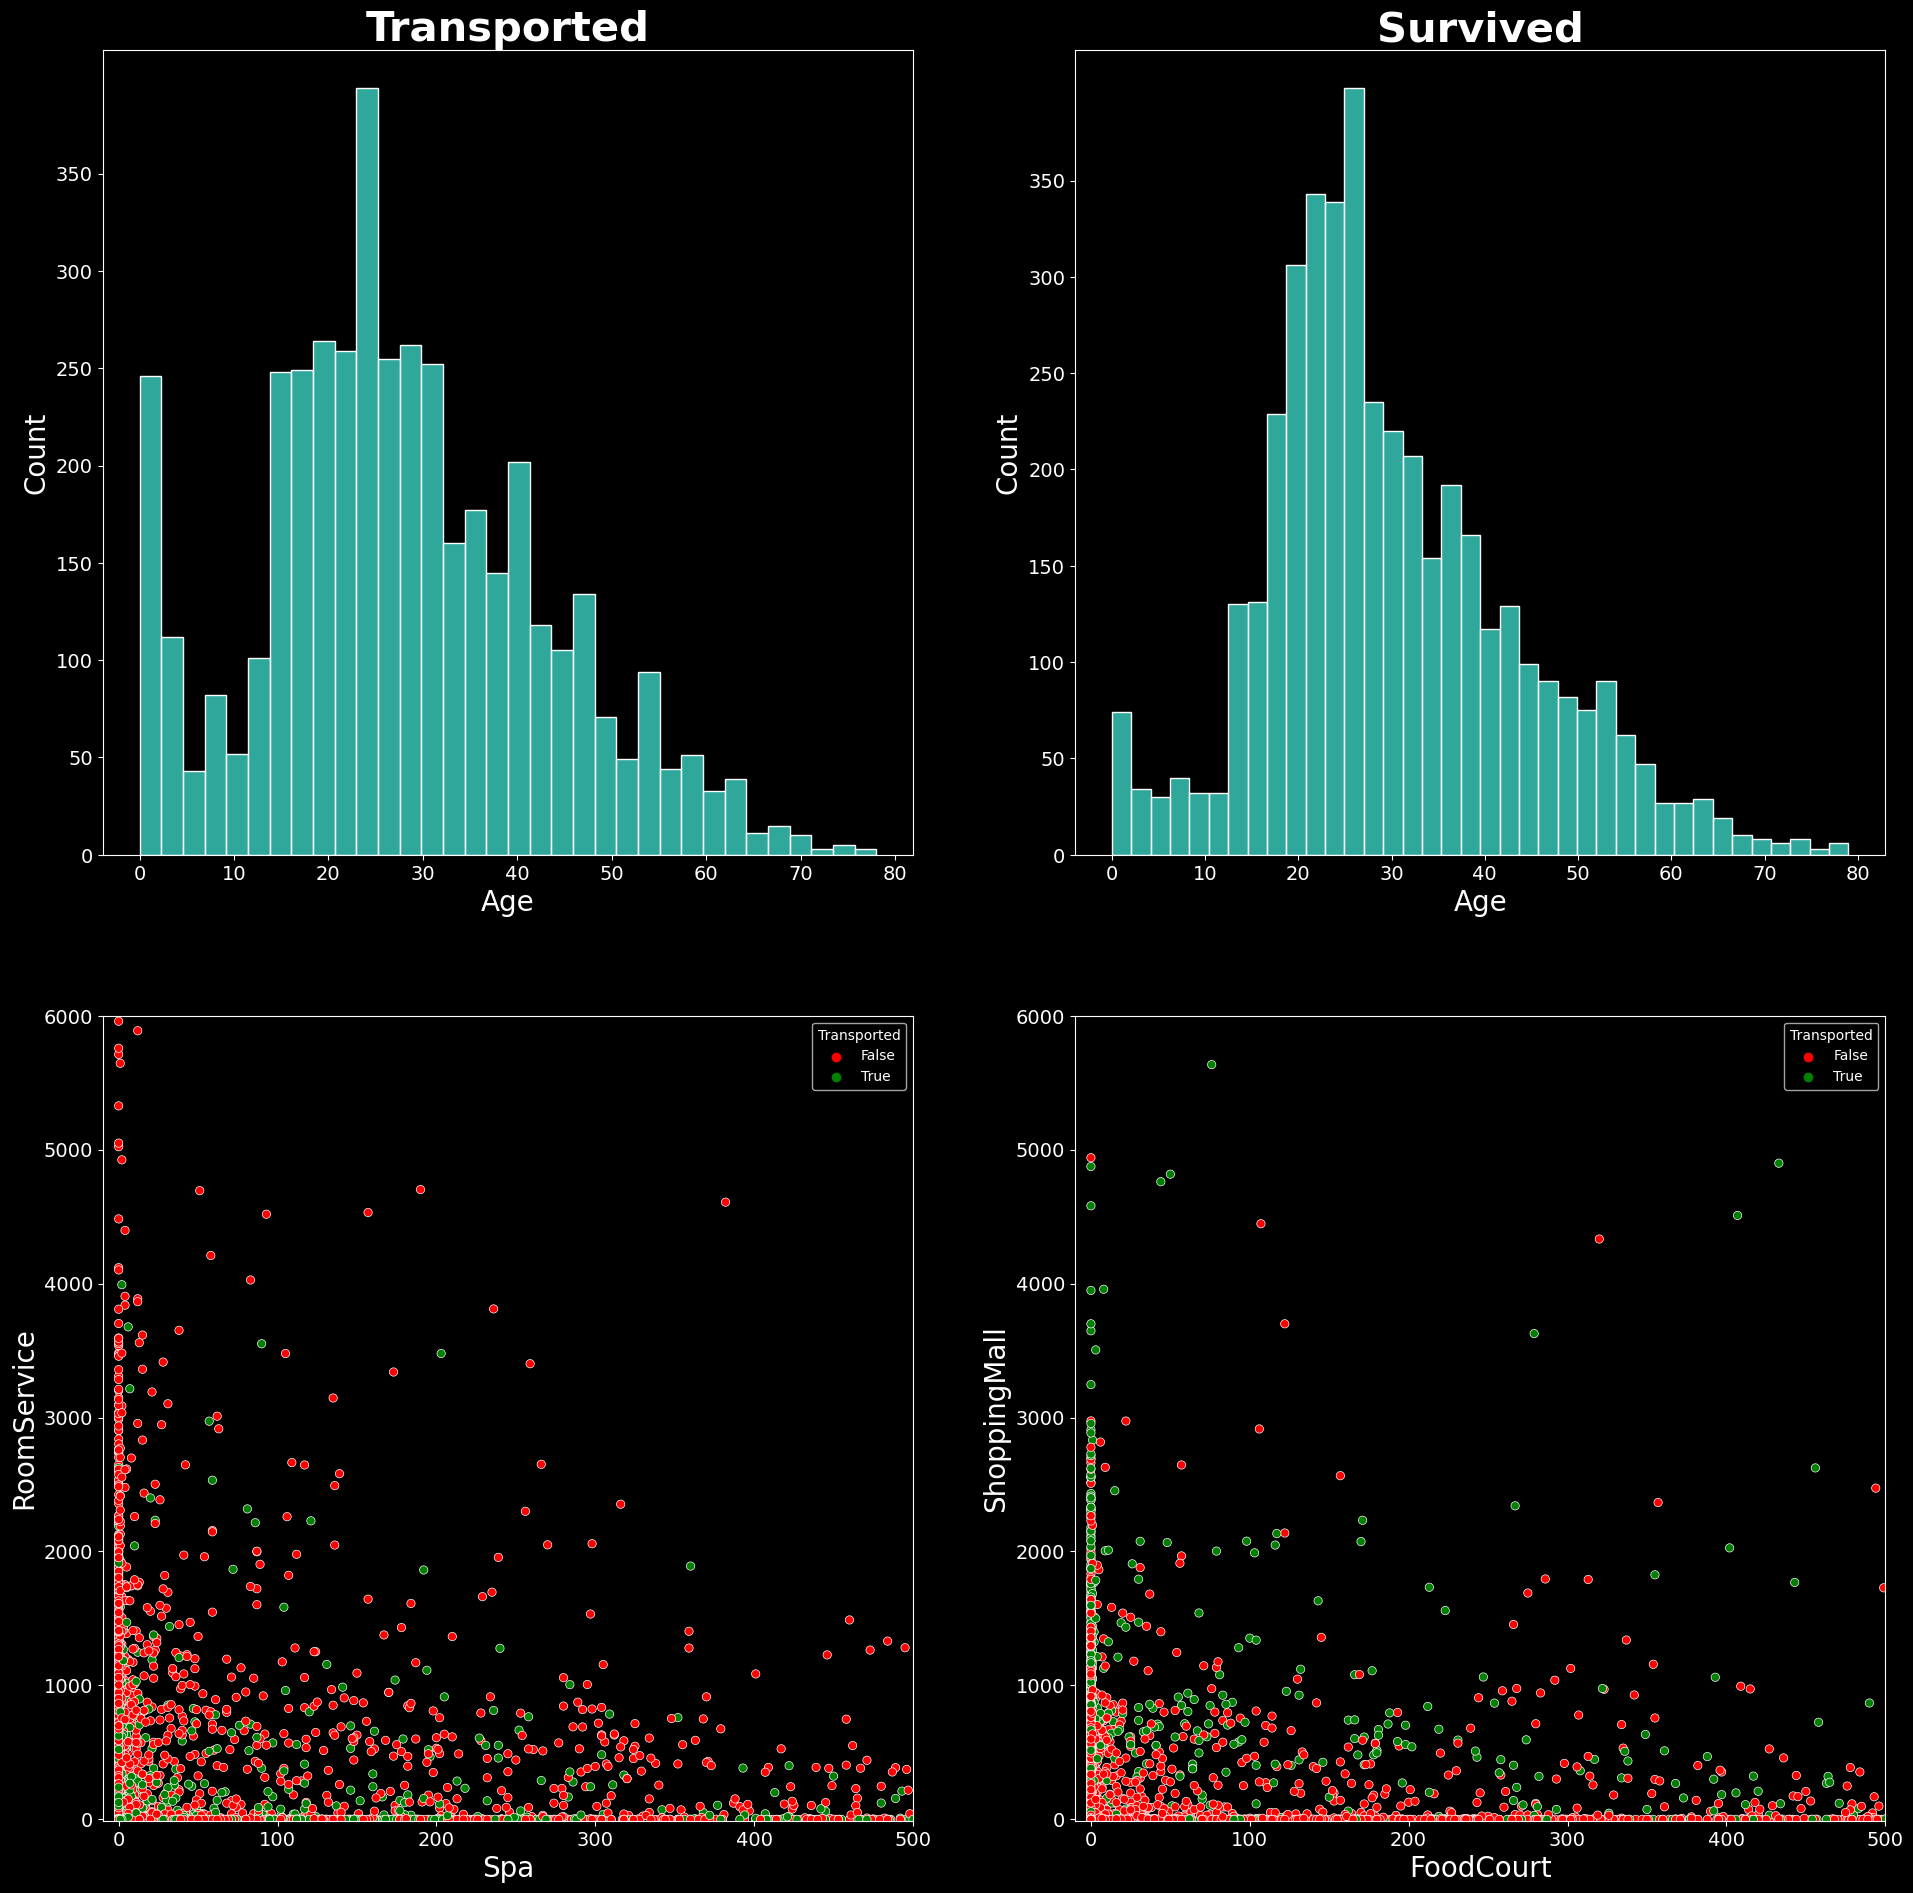

In [14]:
t = train[train.Transported == True]
s = train[train.Transported == False]

plt.subplot(221)
plt.title('Transported', fontsize=30, fontweight='bold')
sns.histplot(data=t, x='Age', color='#40E0D0')
plt.yticks(np.arange(0, 400, 50))

plt.subplot(222)
plt.title('Survived', fontsize=30, fontweight='bold')
sns.histplot(data=s, x='Age', color='#40E0D0')
plt.yticks(np.arange(0, 400, 50))


plt.subplot(223)
sns.scatterplot(data=train, x='Spa', y='RoomService', hue='Transported', palette=['red', 'green'])
plt.xlim(-10, 500)
plt.ylim(-10, 6000)


plt.subplot(224)
sns.scatterplot(data=train, x='FoodCourt', y='ShoppingMall', hue='Transported', palette=['red', 'green'])
plt.xlim(-10, 500)
plt.ylim(-10, 6000)

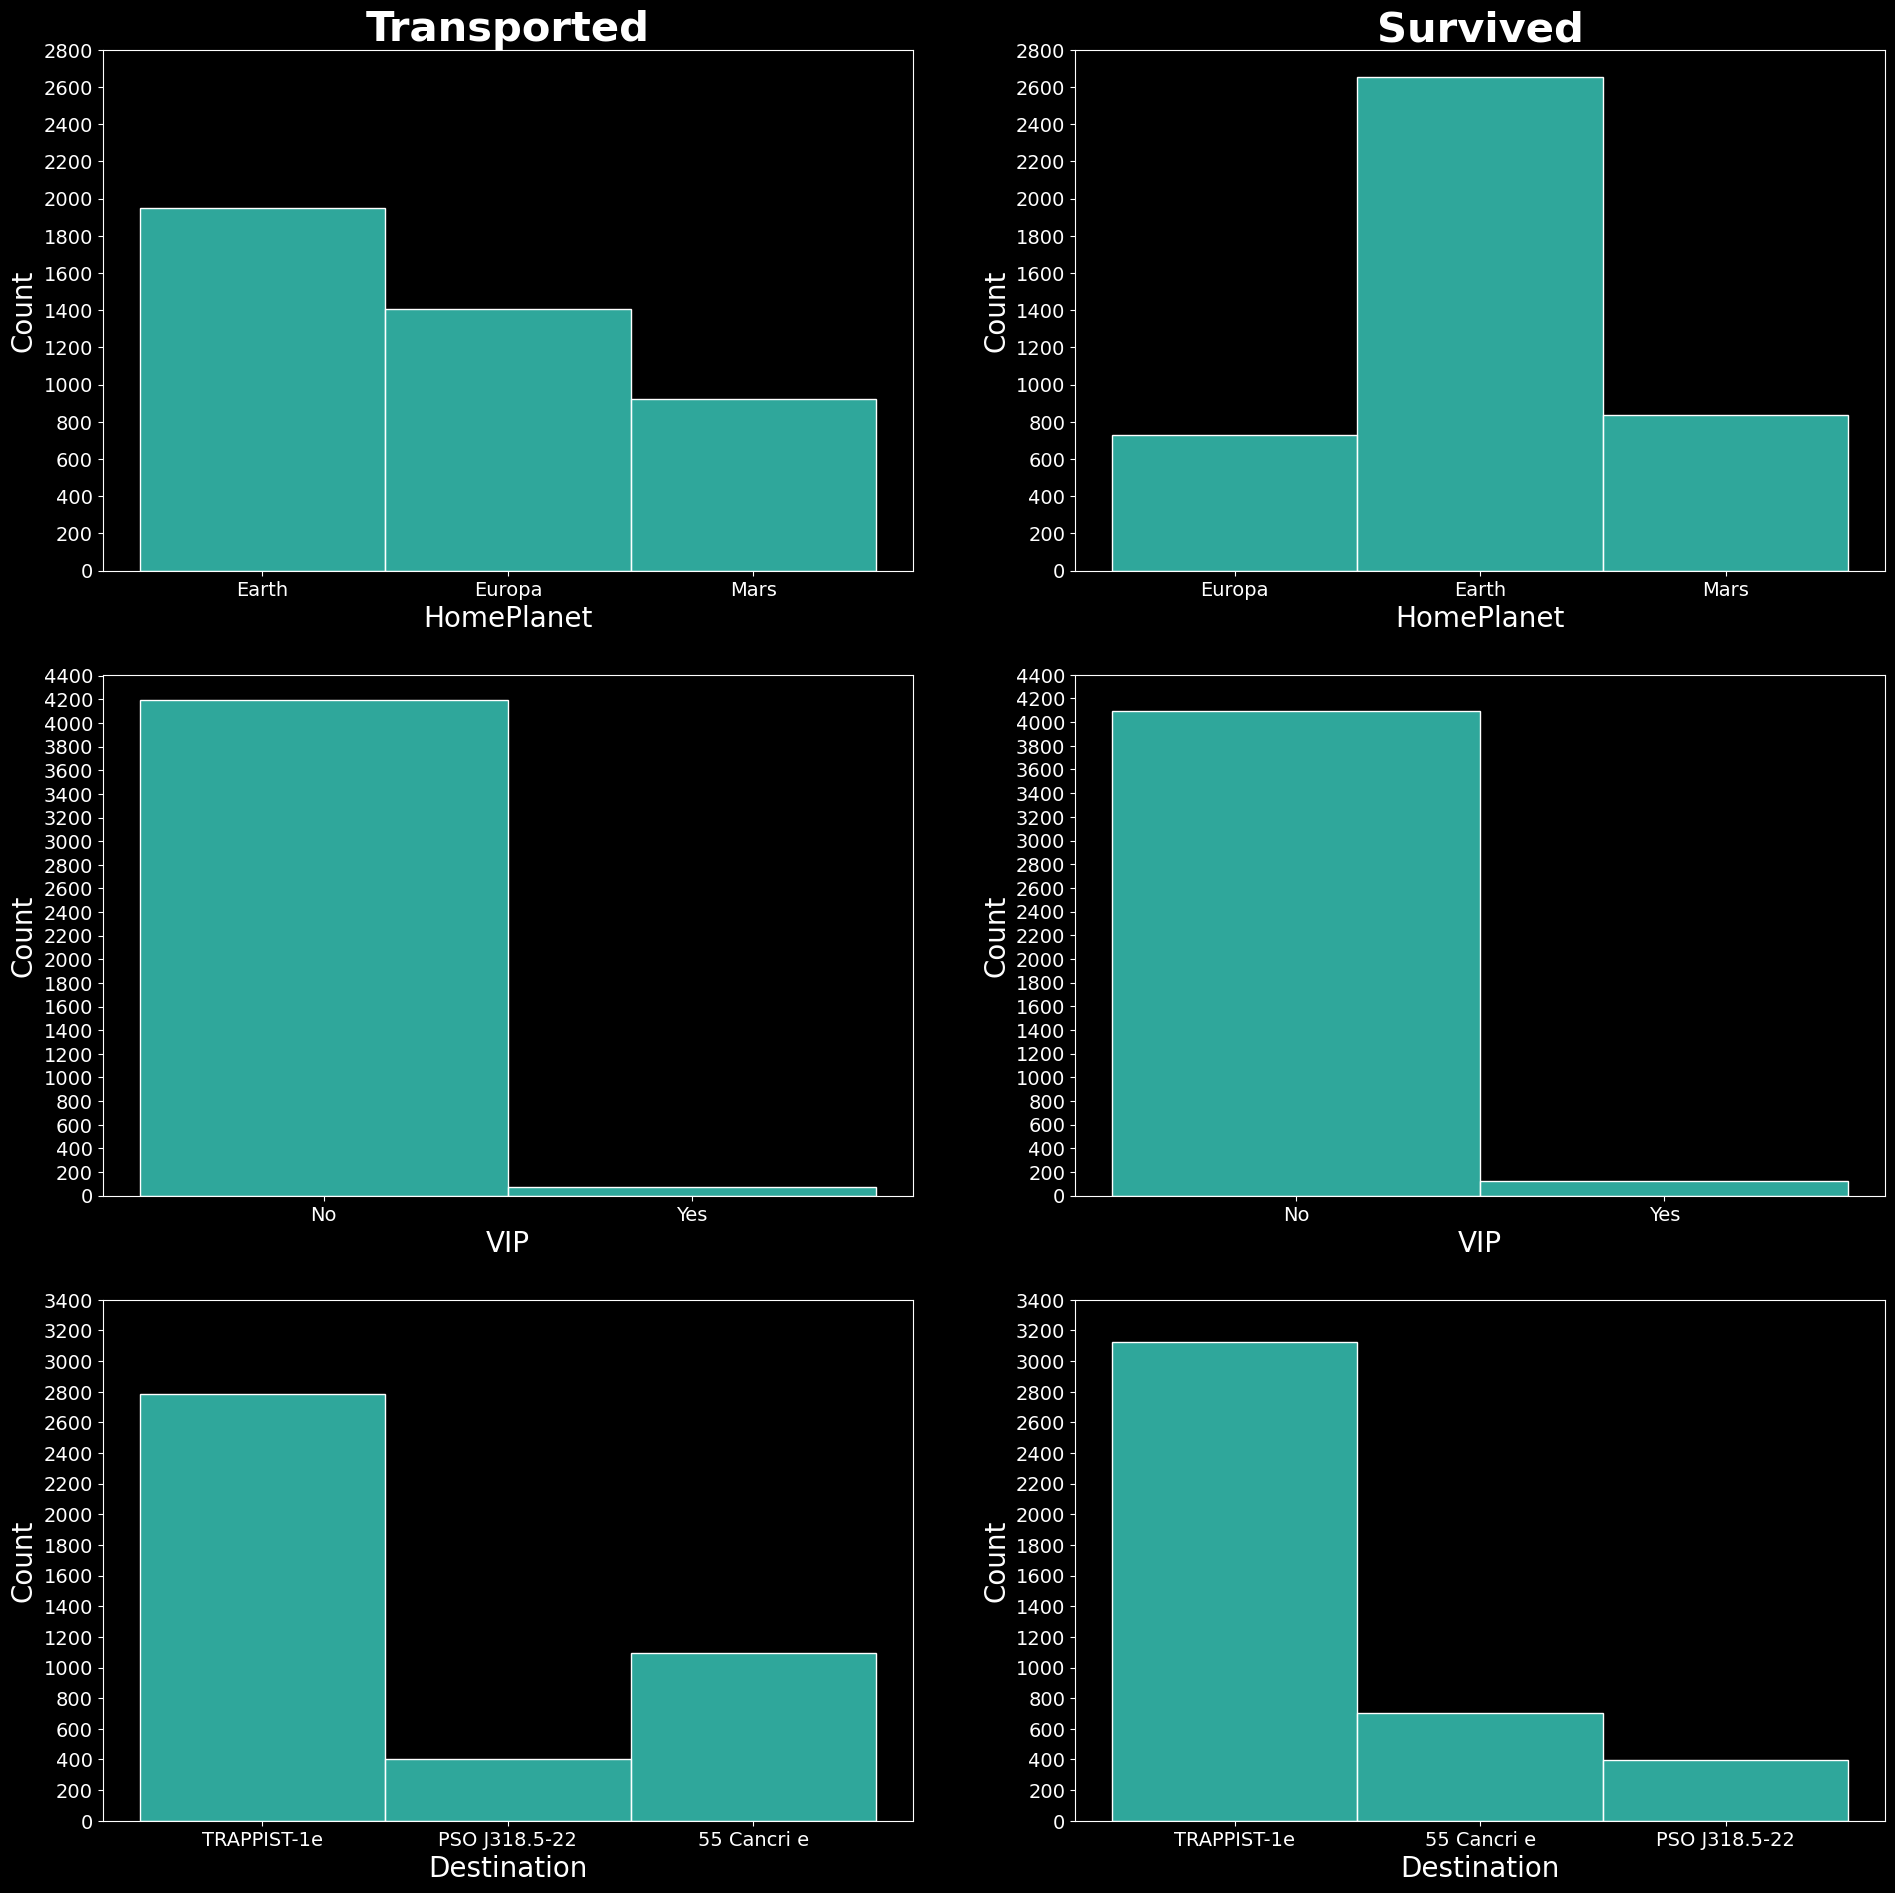

In [15]:
t['VIP'] = t["VIP"].map({True:'Yes', False:'No'})
s['VIP'] = s["VIP"].map({True:'Yes', False:'No'})


plt.subplot(321)
plt.title('Transported', fontsize=30, fontweight='bold')
sns.histplot(data=t, x='HomePlanet', color='#40E0D0')
plt.yticks(np.arange(0, 3000, 200))

plt.subplot(322)
plt.title('Survived', fontsize=30, fontweight='bold')
sns.histplot(data=s, x='HomePlanet', color='#40E0D0')
plt.yticks(np.arange(0, 3000, 200))

plt.subplot(323)
sns.histplot(data=t, x='VIP', color='#40E0D0')
plt.yticks(np.arange(0, 4500, 200))

plt.subplot(324)
sns.histplot(data=s, x='VIP', color='#40E0D0')
plt.yticks(np.arange(0, 4500, 200))


plt.subplot(325)
sns.histplot(data=t, x='Destination', color='#40E0D0')
plt.yticks(np.arange(0, 3500, 200))

plt.subplot(326)
sns.histplot(data=s, x='Destination', color='#40E0D0')
plt.yticks(np.arange(0, 3500, 200))

plt.show()

In [16]:
train['FirstName'] = train[train['Name'].notnull()]['Name'].map(lambda x : x.split()[0][0])
train['LastName'] = train[train['Name'].notnull()]['Name'].map(lambda x : x.split()[1][0])

<AxesSubplot:xlabel='LastName', ylabel='Count'>

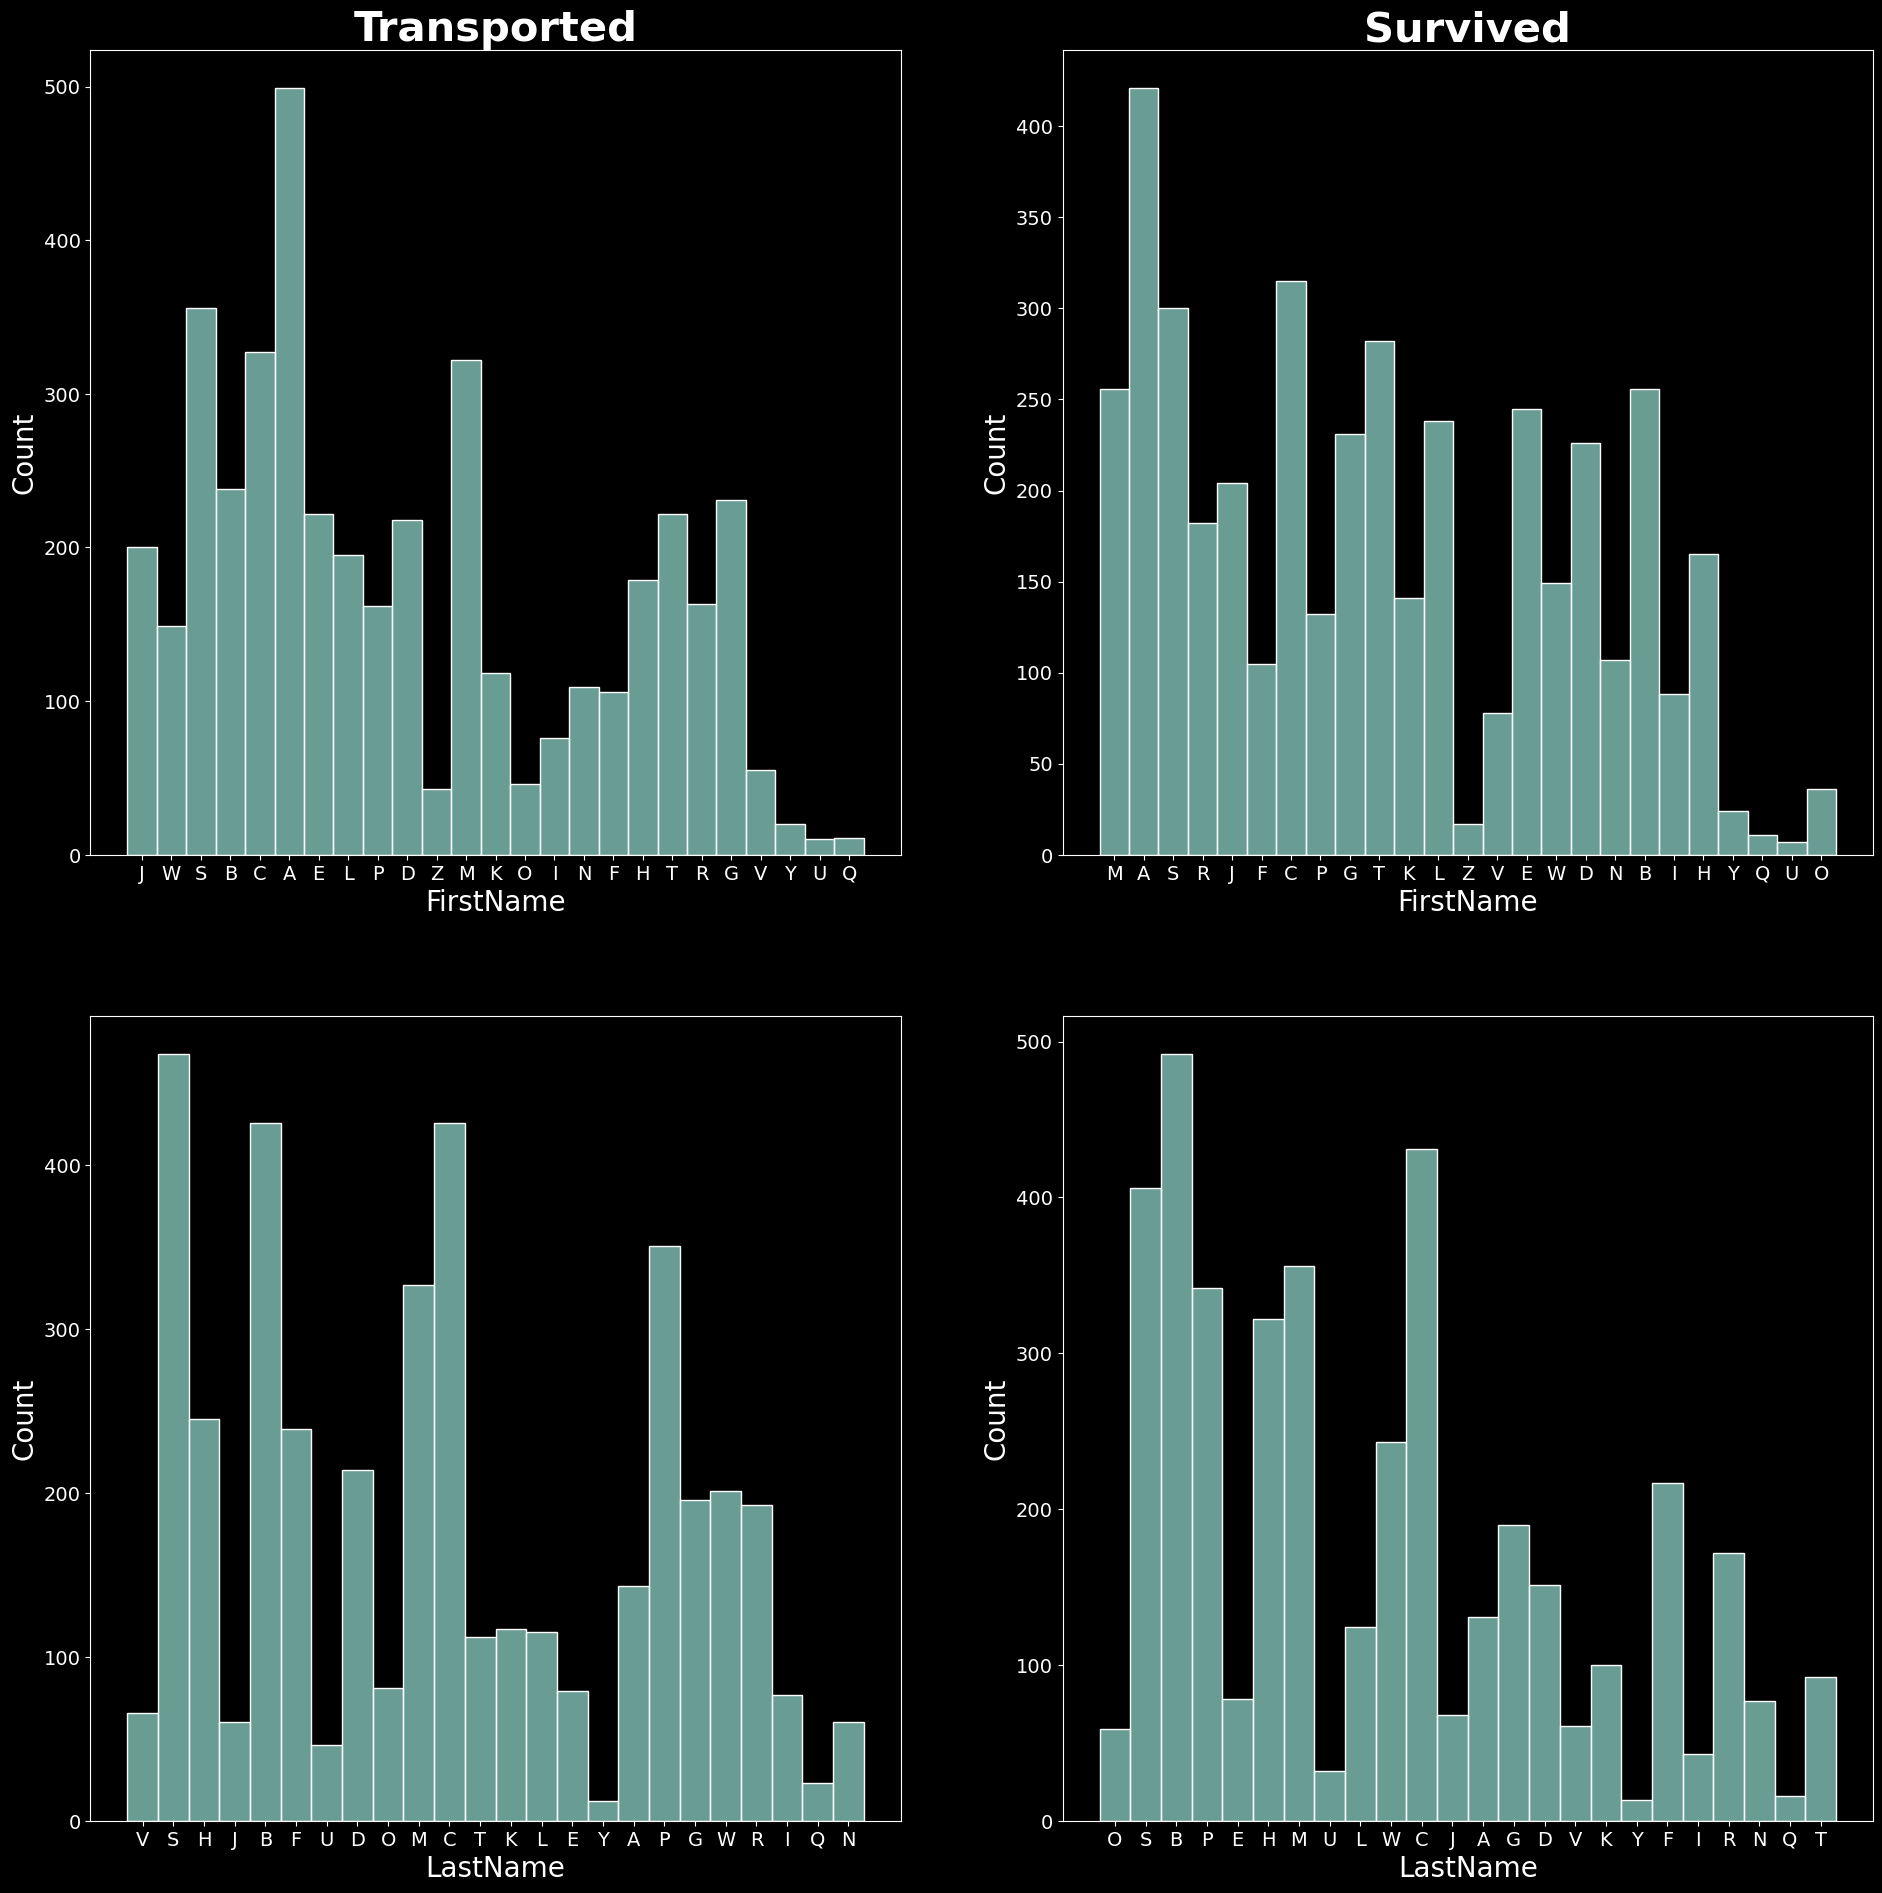

In [17]:
t1 = train[train.Transported == True]
s1 = train[train.Transported == False]

plt.subplot(2,2,1)
plt.title('Transported', fontsize=30, fontweight='bold')
sns.histplot(data=t1, x='FirstName')

plt.subplot(2,2,2)
plt.title('Survived', fontsize=30, fontweight='bold')
sns.histplot(data=s1, x='FirstName')


plt.subplot(2,2,3)
sns.histplot(data=t1, x='LastName')

plt.subplot(2,2,4)
sns.histplot(data=s1, x='LastName')

In [18]:
train.drop(['FirstName', 'LastName'], axis=1, inplace=True)

In [19]:
train['CabinFirst'] = train[train['Cabin'].notnull()]['Cabin'].map(lambda x: x.split('/')[0])
train['CabinNum'] = train[train['Cabin'].notnull()]['Cabin'].map(lambda x: float(x.split('/')[1]))
train['CabinLast'] = train[train['Cabin'].notnull()]['Cabin'].map(lambda x: x.split('/')[2])

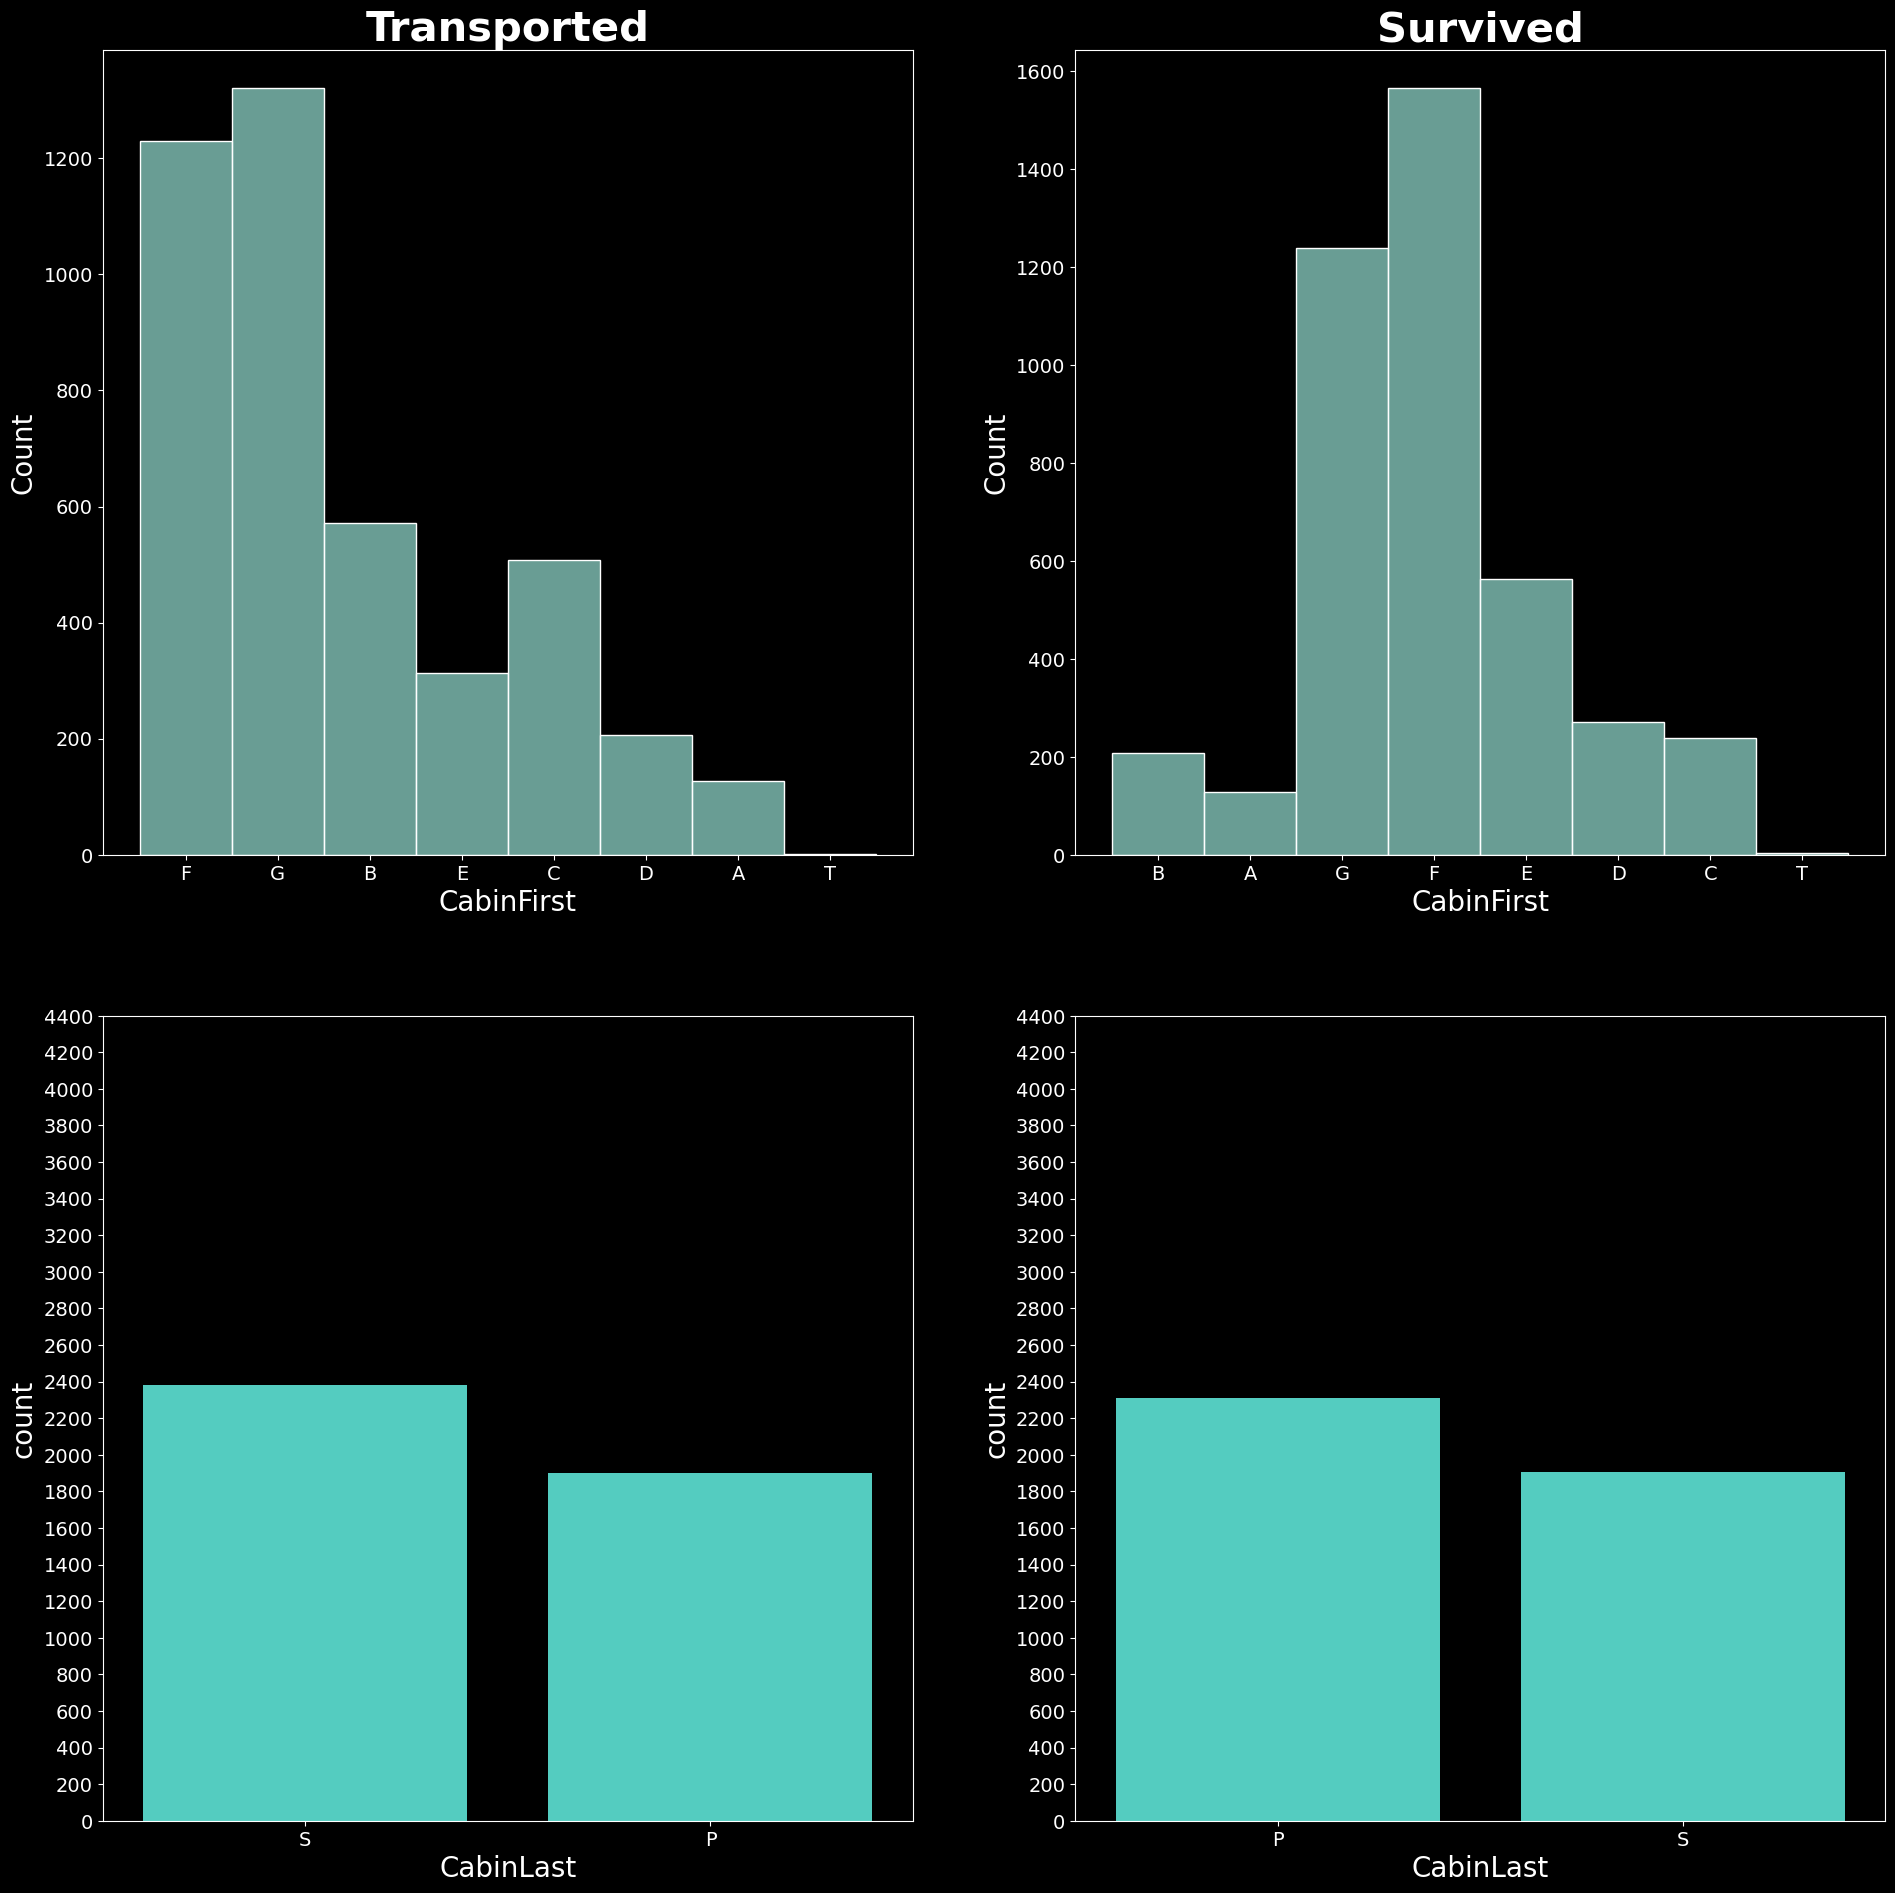

In [20]:
t2 = train[train.Transported == True]
s2 = train[train.Transported == False]

plt.subplot(2,2,1)
plt.title('Transported', fontsize=30, fontweight='bold')
sns.histplot(data=t2, x='CabinFirst')

plt.subplot(2,2,2)
plt.title('Survived', fontsize=30, fontweight='bold')
sns.histplot(data=s2, x='CabinFirst')

plt.subplot(223)
sns.countplot(data=t2, x='CabinLast', color='#40E0D0')
plt.yticks(np.arange(0, 4500, 200))

plt.subplot(224)
sns.countplot(data=s2, x='CabinLast', color='#40E0D0')
plt.yticks(np.arange(0, 4500, 200))

plt.show()

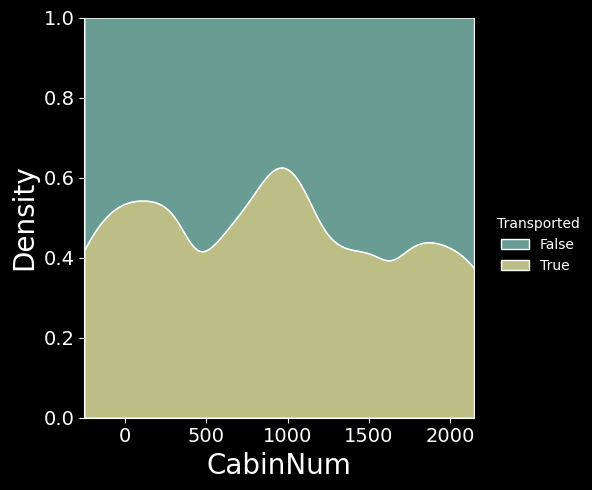

In [21]:
sns.displot(data=train, x='CabinNum', hue='Transported', multiple='fill', kind='kde')

In [22]:
train.drop(['CabinFirst', 'CabinNum', 'CabinLast'], axis=1, inplace=True)

In [23]:
train['Luxuries'] = train['RoomService'] + train['VRDeck'] + train['Spa']
train['EdableLuxuries'] = train['FoodCourt'] + train['ShoppingMall']
train['Services'] = train['Luxuries'] + train['EdableLuxuries'] 

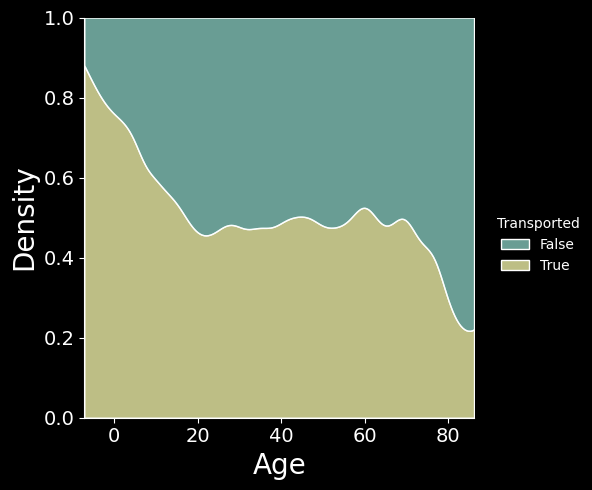

In [24]:
sns.displot(data=train, x='Age', hue='Transported', multiple='fill', kind='kde')

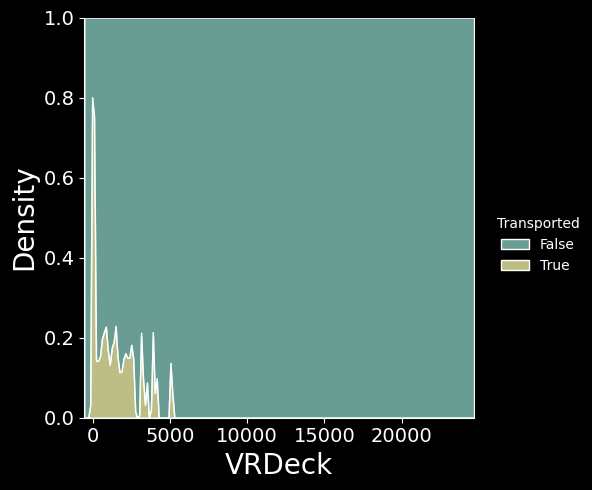

In [25]:
sns.displot(data=train, x='VRDeck', hue='Transported', multiple='fill', kind='kde')

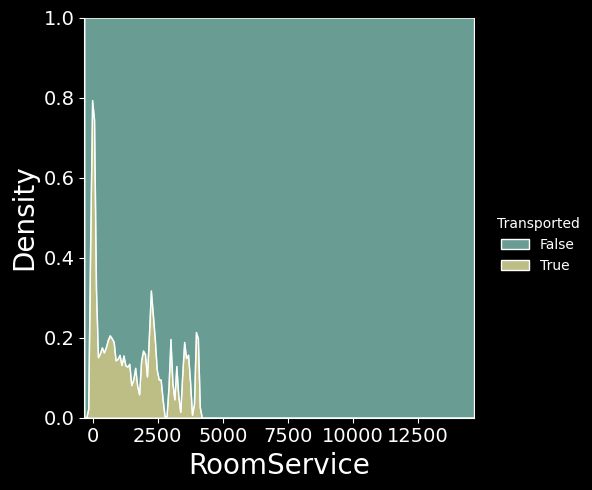

In [26]:
sns.displot(data=train, x='RoomService', hue='Transported', multiple='fill', kind='kde')

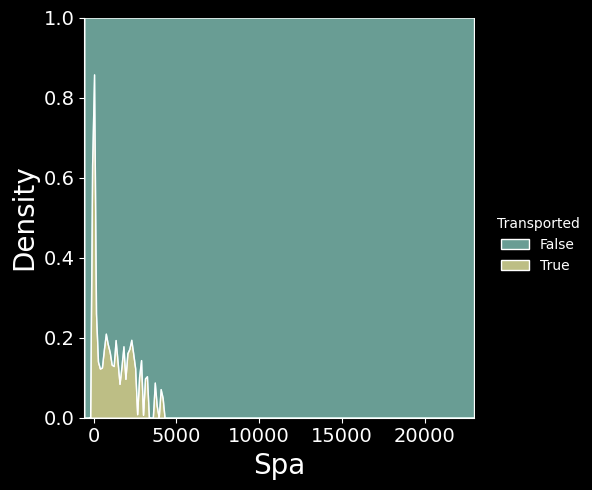

In [27]:
sns.displot(data=train, x='Spa', hue='Transported', multiple='fill', kind='kde')

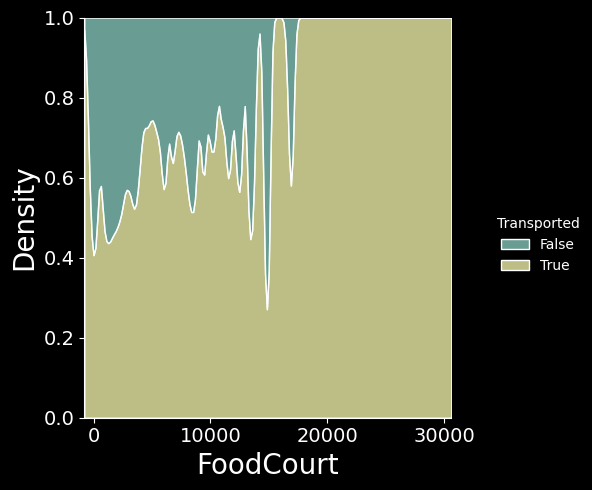

In [28]:
sns.displot(data=train, x='FoodCourt', hue='Transported', multiple='fill', kind='kde')

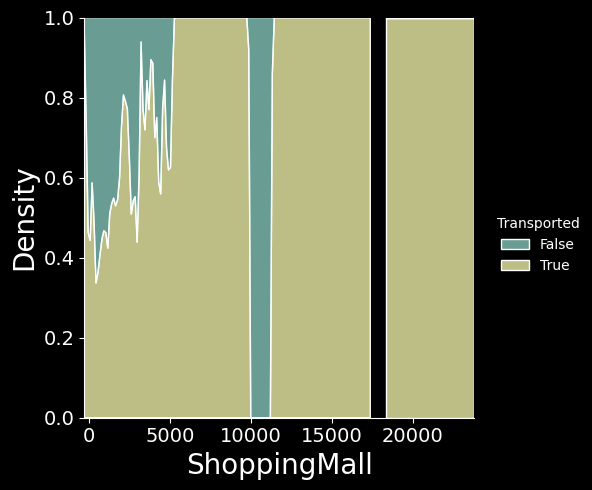

In [29]:
sns.displot(data=train, x='ShoppingMall', hue='Transported', multiple='fill', kind='kde')

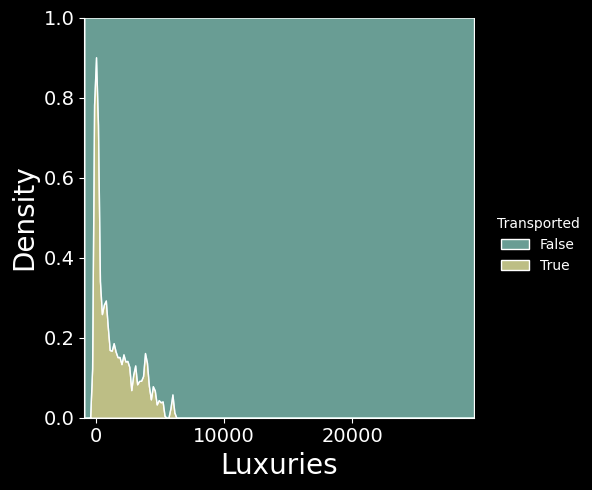

In [30]:
sns.displot(data=train, x='Luxuries', hue='Transported', multiple='fill', kind='kde')

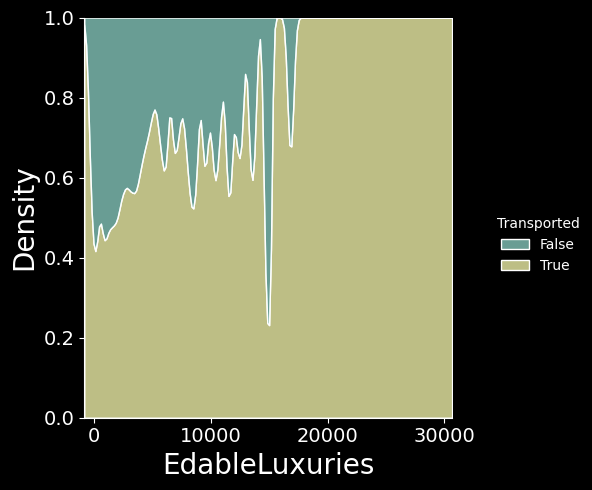

In [31]:
sns.displot(data=train, x='EdableLuxuries', hue='Transported', multiple='fill', kind='kde')

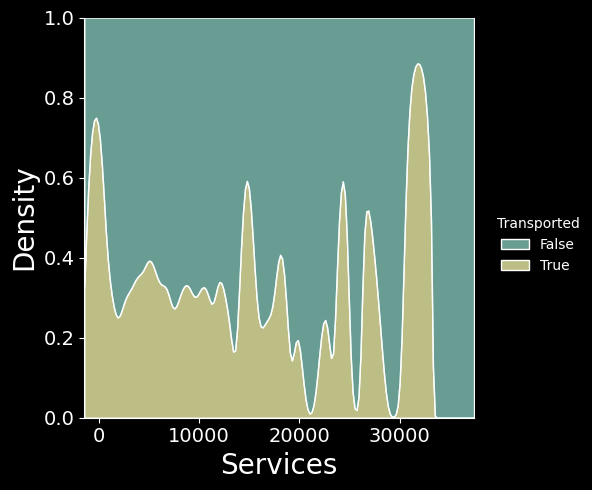

In [32]:
sns.displot(data=train, x='Services', hue='Transported', multiple='fill', kind='kde')

In [33]:
train.drop(['Luxuries', 'EdableLuxuries', 'Services'], axis=1, inplace=True)

In [34]:
def heatmapPlot(data):
    corr_mat = data.corr()
    return sns.heatmap(corr_mat, mask=np.triu(np.ones_like(corr_mat, dtype=bool)), annot=True)

def corrMat(data):
    corr_mat = data.corr()
    print(corr_mat['Transported'].sort_values(ascending=False))

<AxesSubplot:>

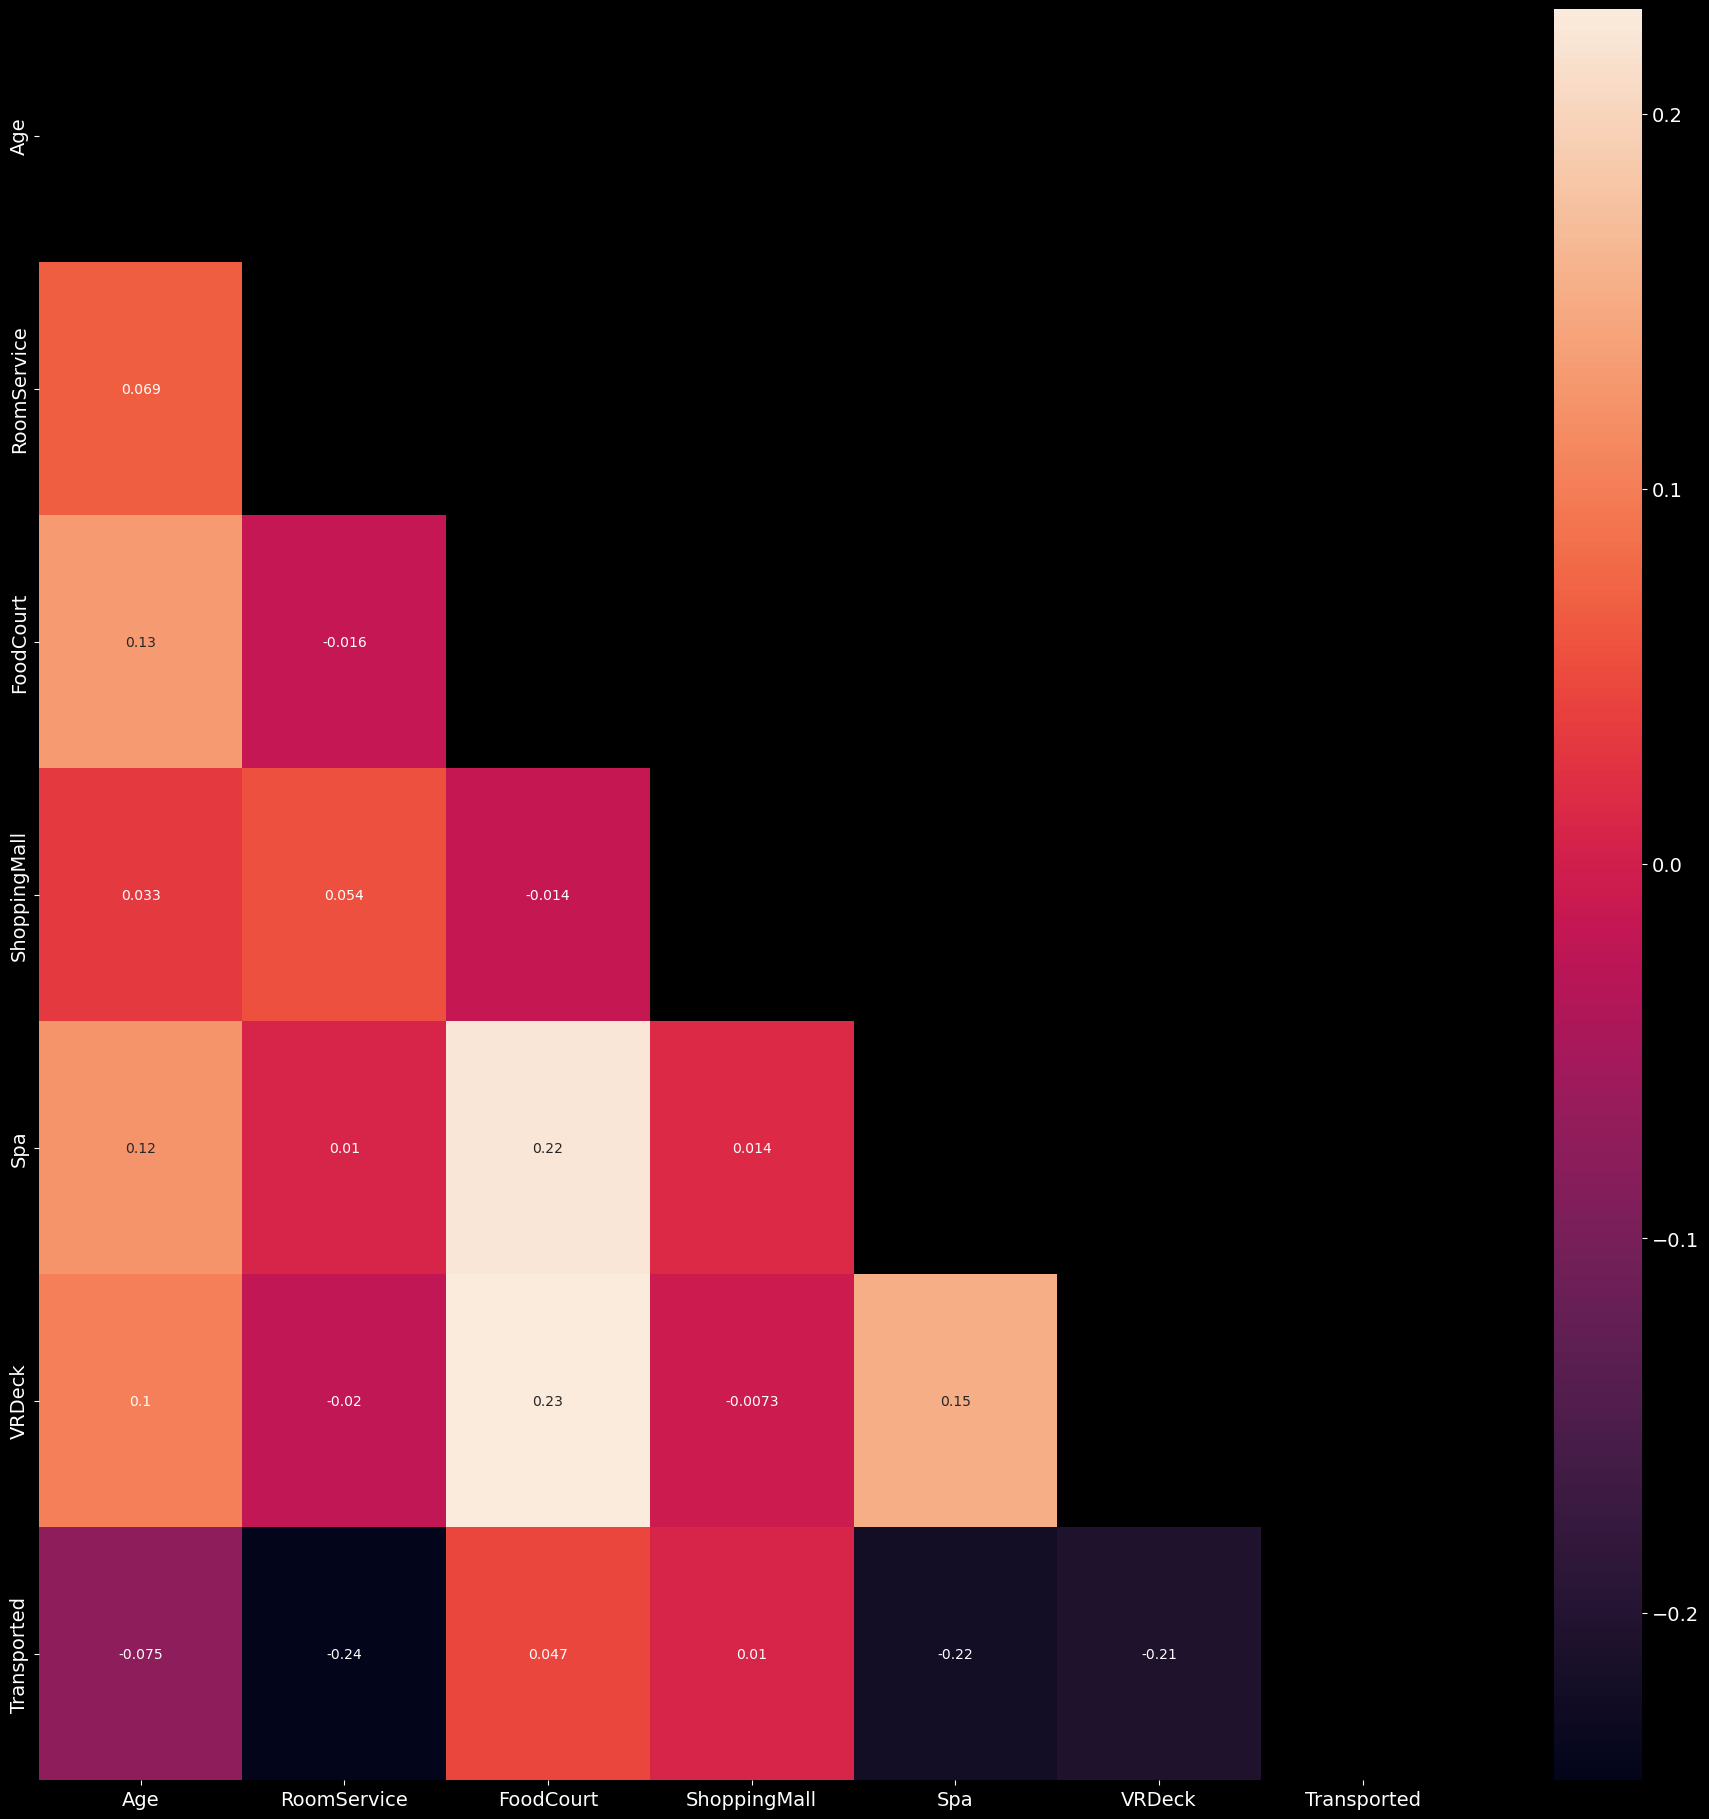

In [35]:
heatmapPlot(train)

In [36]:
corrMat(train)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64


In [37]:
class Transformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return X
    
    def transform(self, X):
        
        X_setted = X.set_index('PassengerId')
        X_drop = X_setted.drop(['Name', 'VIP', 'Destination'], axis=1)
        
        X_drop.fillna(X_drop[['HomePlanet', 'CryoSleep']].mode().iloc[0], inplace=True)
        
        X_drop['CabinFirst'] = X_drop[X_drop['Cabin'].notnull()]['Cabin'].map(lambda x: x.split('/')[0])
        X_drop['CabinNum'] = X_drop[X_drop['Cabin'].notnull()]['Cabin'].map(lambda x: float(x.split('/')[1]))
        X_drop['CabinLast'] = X_drop[X_drop['Cabin'].notnull()]['Cabin'].map(lambda x: x.split('/')[2])
            
        X_drop.fillna(X_drop[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck', 'Spa', 'CryoSleep', 'CabinNum']].mean(), inplace=True)
        
        X_drop['Luxuries'] = X_drop['RoomService'] + X_drop['VRDeck'] + X_drop['Spa']
        X_drop['EdableLuxuries'] = X_drop['FoodCourt'] + X_drop['ShoppingMall']
        
        
        X_drop.drop(['Cabin', 'RoomService', 'VRDeck', 'Spa', 'FoodCourt', 'ShoppingMall'], axis=1, inplace=True)
        
        
        X_drop['CryoSleep'] = X_drop['CryoSleep'].astype('float64')
        
        home_encoded = pd.get_dummies(X_drop['HomePlanet'], prefix='Home')
        
        cabinFirst_encoded = pd.get_dummies(X_drop['CabinFirst'], prefix='CF')
        
        cabinLast_encoded = pd.get_dummies(X_drop['CabinLast'], prefix='CL')
        
        X_drop.drop(['HomePlanet', 'CabinFirst', 'CabinLast'], axis=1, inplace=True)
        
        X_final = pd.concat([X_drop, home_encoded, cabinFirst_encoded, cabinLast_encoded], axis=1)
        
        return pd.DataFrame(X_final)

In [38]:
transformer = Transformer()
transformer.fit(train)
train_transformed = transformer.transform(train)

In [39]:
train_transformed.head()

,CryoSleep,Age,Transported,CabinNum,Luxuries,EdableLuxuries,Home_Earth,Home_Europa,Home_Mars,CF_A,CF_B,CF_C,CF_D,CF_E,CF_F,CF_G,CF_T,CL_P,CL_S
PassengerId,,,,,,,,,,,,,,,,,,,
0001_01,0.0,39.0,False,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0
0002_01,0.0,24.0,True,0.0,702.0,34.0,1,0,0,0,0,0,0,0,1,0,0,0,1
0003_01,0.0,58.0,False,0.0,6807.0,3576.0,0,1,0,1,0,0,0,0,0,0,0,0,1
0003_02,0.0,33.0,False,0.0,3522.0,1654.0,0,1,0,1,0,0,0,0,0,0,0,0,1
0004_01,0.0,16.0,True,1.0,870.0,221.0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [40]:
train_transformed.shape

(8693, 19)

In [41]:
train_transformed.dtypes

CryoSleep         float64
Age               float64
Transported          bool
CabinNum          float64
Luxuries          float64
EdableLuxuries    float64
Home_Earth          uint8
Home_Europa         uint8
Home_Mars           uint8
CF_A                uint8
CF_B                uint8
CF_C                uint8
CF_D                uint8
CF_E                uint8
CF_F                uint8
CF_G                uint8
CF_T                uint8
CL_P                uint8
CL_S                uint8
dtype: object

In [42]:
corrMat(train_transformed)

Transported       1.000000
CryoSleep         0.460132
Home_Europa       0.176916
CF_B              0.144733
CF_C              0.108193
CL_S              0.101455
EdableLuxuries    0.046875
Home_Mars         0.019544
CF_G              0.016269
CF_A             -0.002623
CF_T             -0.014568
CF_D             -0.034046
CabinNum         -0.044578
Age              -0.074249
CF_F             -0.087753
CF_E             -0.097965
CL_P             -0.101397
Home_Earth       -0.168845
Luxuries         -0.348635
Name: Transported, dtype: float64


<AxesSubplot:>

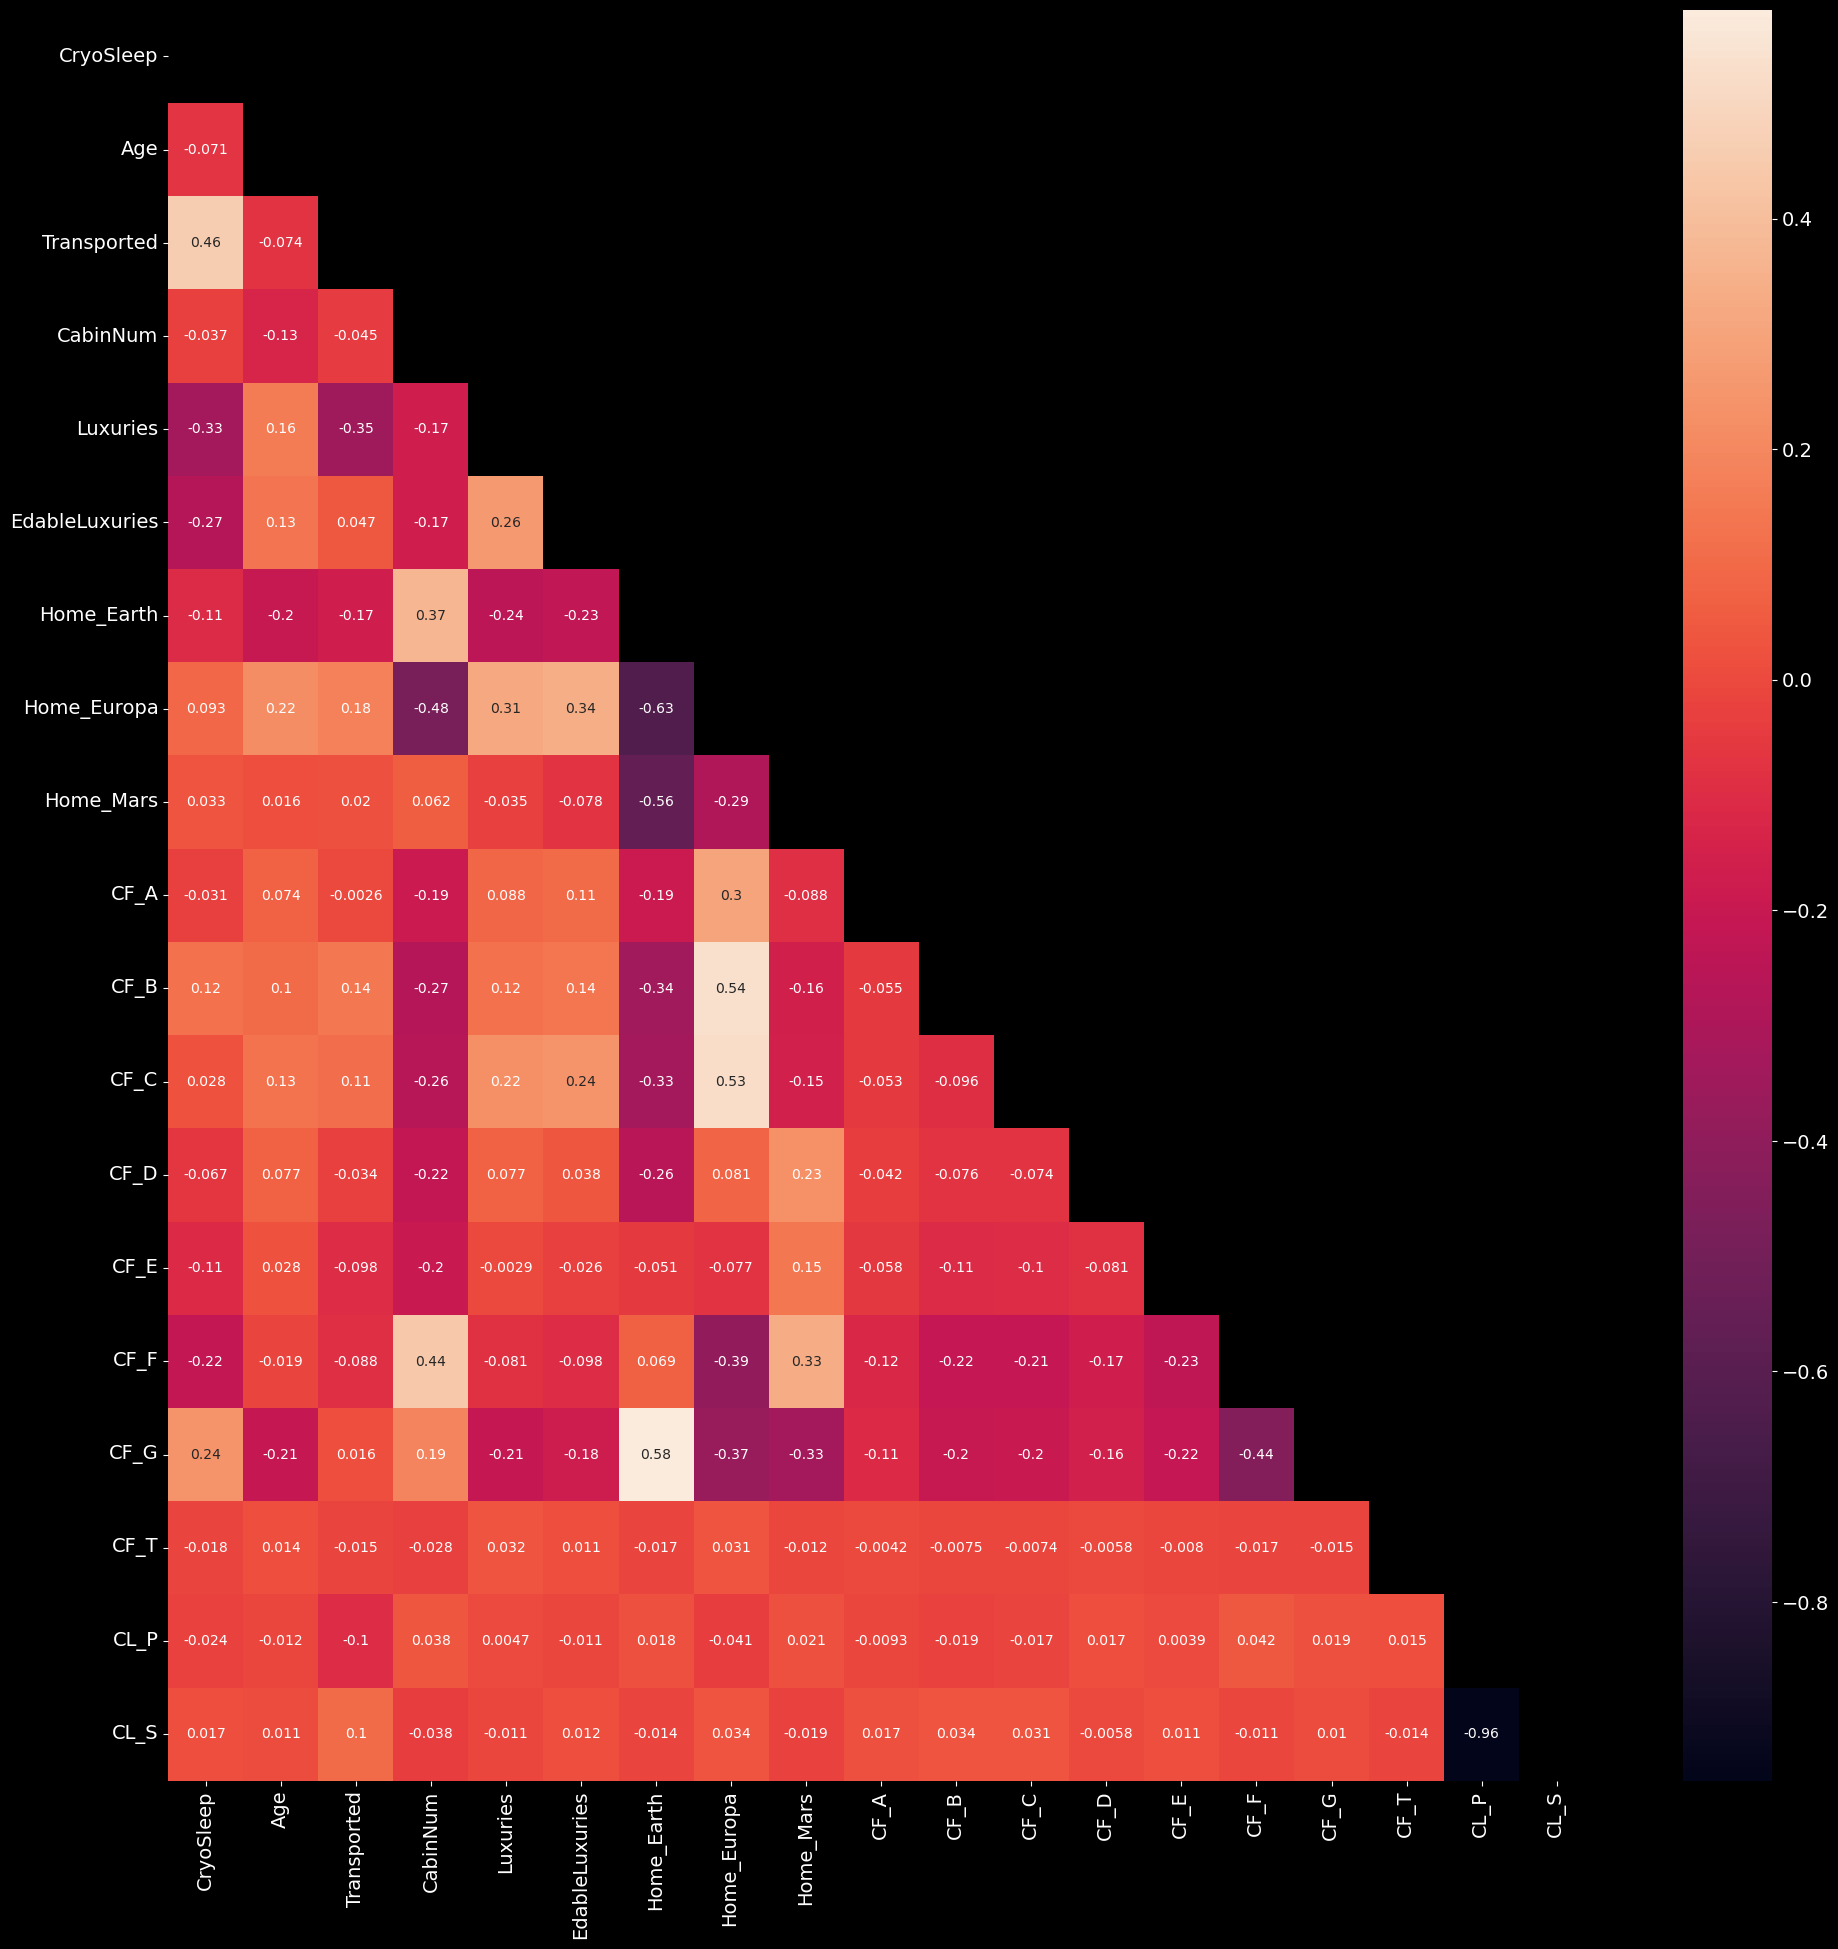

In [43]:
heatmapPlot(train_transformed)

In [44]:
train_transformed.to_csv('data/train_transformed.csv')

In [45]:
x_train, y_train = train_transformed.drop('Transported', axis=1), train_transformed['Transported']

In [46]:
x_train.isna().sum()

CryoSleep         0
Age               0
CabinNum          0
Luxuries          0
EdableLuxuries    0
Home_Earth        0
Home_Europa       0
Home_Mars         0
CF_A              0
CF_B              0
CF_C              0
CF_D              0
CF_E              0
CF_F              0
CF_G              0
CF_T              0
CL_P              0
CL_S              0
dtype: int64

In [47]:
y_train.head()

PassengerId
0001_01    False
0002_01     True
0003_01    False
0003_02    False
0004_01     True
Name: Transported, dtype: bool

In [48]:
x_train.shape

(8693, 18)

In [49]:
y_train.shape

(8693,)

In [50]:
test_transformed = transformer.transform(test)

In [51]:
test_transformed.to_csv('data/test_transformed.csv')

<h1>SGD Classifier</h1>

In [52]:
sgd_clf = SGDClassifier()

sgd_clf.fit(x_train, y_train.astype('int'))

SGDClassifier()

In [53]:
result = pd.DataFrame(sgd_clf.predict(test_transformed), columns=['Transported'], index=test_transformed.index)

result['Transported'] = result['Transported'].map({1:'True', 0:'False'})

result.to_csv('results/SGD_result.csv')

<h1>SVC</h1>

In [54]:
svc = SVC(C=10, kernel='sigmoid')

svc.fit(x_train, y_train)

SVC(C=10, kernel='sigmoid')

In [55]:
result = pd.DataFrame(svc.predict(test_transformed), columns=['Transported'], index=test_transformed.index)


result.to_csv('results/SVC_result.csv')

In [56]:
result['Transported']

PassengerId
0013_01     True
0018_01    False
0019_01     True
0021_01    False
0023_01     True
           ...  
9266_02     True
9269_01     True
9271_01     True
9273_01    False
9277_01     True
Name: Transported, Length: 4277, dtype: bool

<h1>Neural Network</h1>

In [57]:
model = keras.Sequential([
    keras.layers.Dense(36, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(48, activation='relu'),
    keras.layers.Dense(36, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(6, activation='relu'),        
    keras.layers.Dense(1, activation='sigmoid')
])

In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC'])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                684       
                                                                 
 dense_1 (Dense)             (None, 48)                1776      
                                                                 
 dense_2 (Dense)             (None, 36)                1764      
                                                                 
 dense_3 (Dense)             (None, 9)                 333       
                                                                 
 dense_4 (Dense)             (None, 6)                 60        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 4,624
Trainable params: 4,624
Non-trainabl

In [60]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
272/272 [==============================] - 1s 760us/step - loss: 1.0191 - accuracy: 0.6398 - auc: 0.6467
Epoch 2/10
272/272 [==============================] - 0s 759us/step - loss: 0.5431 - accuracy: 0.7692 - auc: 0.7981
Epoch 3/10
272/272 [==============================] - 0s 763us/step - loss: 0.5141 - accuracy: 0.7821 - auc: 0.8125
Epoch 4/10
272/272 [==============================] - 0s 742us/step - loss: 0.5080 - accuracy: 0.7814 - auc: 0.8116
Epoch 5/10
272/272 [==============================] - 0s 762us/step - loss: 0.5072 - accuracy: 0.7797 - auc: 0.8143
Epoch 6/10
272/272 [==============================] - 0s 744us/step - loss: 0.5099 - accuracy: 0.7821 - auc: 0.8146
Epoch 7/10
272/272 [==============================] - 0s 804us/step - loss: 0.5043 - accuracy: 0.7813 - auc: 0.8159
Epoch 8/10
272/272 [==============================] - 0s 761us/step - loss: 0.5029 - accuracy: 0.7801 - auc: 0.8155
Epoch 9/10
272/272 [==============================] - 0s 757us/step - lo

In [61]:
result = pd.DataFrame(model.predict(test_transformed), columns=['Transported'], index=test_transformed.index)

134/134 [==============================] - 0s 569us/step


In [62]:
result['Transported'] = result['Transported'].map(lambda x : True if x > 0.5 else False)

In [63]:
result.to_csv('results/NeuralNet_result.csv')

<h1>KNN Classifier</h1>

In [64]:
tmp_acc = 1

for i in range(1, 20):
    
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    
    knn_clf.fit(x_train, y_train)
    y_pred = knn_clf.predict(x_train)
    acc = metrics.accuracy_score(y_pred, y_train)
    
    if(acc > tmp_acc):
        neighbor = i - 1
        break
        
    tmp_acc = acc
     

In [65]:
knn_clf = KNeighborsClassifier(n_neighbors=neighbor)
knn_clf.fit(x_train, y_train)

result = pd.DataFrame(knn_clf.predict(test_transformed), columns=['Transported'], index=test_transformed.index)

In [66]:
result['Transported'] = result['Transported'].map(lambda x : True if x > 0.5 else False)

In [67]:
result.to_csv('results/KNNClassifier_result.csv')

<h1>Logistic Regression</h1>

In [68]:
log_reg = LogisticRegression(C=100, solver='newton-cg')

log_reg.fit(x_train, y_train)

result = pd.DataFrame(log_reg.predict(test_transformed), columns=['Transported'], index=test_transformed.index)

In [69]:
log_reg.score(x_train, y_train)

0.7935120211664558

In [70]:
result['Transported'] = result['Transported'].map(lambda x : True if x > 0.5 else False)

In [71]:
result.to_csv('results/Logistic_result.csv')

<h1>Gausssian Model</h1>

In [72]:
gnd = GaussianNB()

gnd.fit(x_train, y_train)

result = pd.DataFrame(gnd.predict(test_transformed), columns=['Transported'], index=test_transformed.index)

In [73]:
gnd.score(x_train, y_train)

0.7669389163694927

In [74]:
result.to_csv('results/Gaussian_result.csv')

<h1>Decision Tree Classifier</h1>

In [75]:
tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=60)

tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=60)

In [76]:
tree_clf.score(x_train, y_train)

0.8023697227654435

In [77]:
result = pd.DataFrame(tree_clf.predict(test_transformed), columns=['Transported'], index=test_transformed.index)

In [78]:
result['Transported'] = result['Transported'].map(lambda x : True if x > 0.5 else False)

In [79]:
result.to_csv('results/DecisionTreeClf_result.csv')

<h1>XGBoost</h1>

In [80]:
xg = XGBClassifier(n_estimators=25, max_depth=4, learning_rate=0.01, objective='binary:logistic')

xg.fit(x_train, y_train)

result = pd.DataFrame(xg.predict(test_transformed), columns=['Transported'], index=test_transformed.index)

result['Transported'] = result['Transported'].map({1:True, 0:False})

In [81]:
xg.score(x_train, y_train)

0.8012193719084321

In [82]:
result.to_csv('results/XGBoost_result.csv')

<h1>CatBoost</h1>

In [83]:
cat = CatBoostClassifier(eval_metric='Accuracy', random_seed=222)
cat.fit(x_train, y_train)

Learning rate set to 0.025939
0:	learn: 0.7775221	total: 142ms	remaining: 2m 22s
1:	learn: 0.7915564	total: 145ms	remaining: 1m 12s
2:	learn: 0.7892557	total: 147ms	remaining: 49s
3:	learn: 0.7812033	total: 150ms	remaining: 37.4s
4:	learn: 0.7826987	total: 153ms	remaining: 30.4s
5:	learn: 0.7844242	total: 155ms	remaining: 25.7s
6:	learn: 0.7847694	total: 158ms	remaining: 22.4s
7:	learn: 0.7849994	total: 161ms	remaining: 19.9s
8:	learn: 0.7873001	total: 163ms	remaining: 18s
9:	learn: 0.7869550	total: 166ms	remaining: 16.4s
10:	learn: 0.7873001	total: 168ms	remaining: 15.1s
11:	learn: 0.7877603	total: 171ms	remaining: 14.1s
12:	learn: 0.7887956	total: 174ms	remaining: 13.2s
13:	learn: 0.7931669	total: 176ms	remaining: 12.4s
14:	learn: 0.7924767	total: 179ms	remaining: 11.8s
15:	learn: 0.7904061	total: 182ms	remaining: 11.2s
16:	learn: 0.7923617	total: 184ms	remaining: 10.6s
17:	learn: 0.7940872	total: 187ms	remaining: 10.2s
18:	learn: 0.7939722	total: 190ms	remaining: 9.79s
19:	learn: 0.

176:	learn: 0.8173243	total: 616ms	remaining: 2.86s
177:	learn: 0.8176694	total: 619ms	remaining: 2.86s
178:	learn: 0.8176694	total: 622ms	remaining: 2.85s
179:	learn: 0.8176694	total: 624ms	remaining: 2.84s
180:	learn: 0.8176694	total: 627ms	remaining: 2.84s
181:	learn: 0.8175544	total: 630ms	remaining: 2.83s
182:	learn: 0.8181295	total: 633ms	remaining: 2.83s
183:	learn: 0.8184746	total: 636ms	remaining: 2.82s
184:	learn: 0.8182446	total: 639ms	remaining: 2.82s
185:	learn: 0.8184746	total: 643ms	remaining: 2.81s
186:	learn: 0.8187047	total: 645ms	remaining: 2.81s
187:	learn: 0.8188197	total: 648ms	remaining: 2.8s
188:	learn: 0.8192799	total: 651ms	remaining: 2.79s
189:	learn: 0.8190498	total: 653ms	remaining: 2.79s
190:	learn: 0.8196250	total: 656ms	remaining: 2.78s
191:	learn: 0.8199701	total: 659ms	remaining: 2.77s
192:	learn: 0.8197400	total: 662ms	remaining: 2.77s
193:	learn: 0.8198551	total: 664ms	remaining: 2.76s
194:	learn: 0.8198551	total: 667ms	remaining: 2.75s
195:	learn: 0

407:	learn: 0.8395261	total: 1.23s	remaining: 1.79s
408:	learn: 0.8396411	total: 1.24s	remaining: 1.79s
409:	learn: 0.8396411	total: 1.24s	remaining: 1.78s
410:	learn: 0.8395261	total: 1.24s	remaining: 1.78s
411:	learn: 0.8395261	total: 1.25s	remaining: 1.78s
412:	learn: 0.8394110	total: 1.25s	remaining: 1.78s
413:	learn: 0.8396411	total: 1.25s	remaining: 1.77s
414:	learn: 0.8396411	total: 1.26s	remaining: 1.77s
415:	learn: 0.8397561	total: 1.26s	remaining: 1.77s
416:	learn: 0.8397561	total: 1.26s	remaining: 1.76s
417:	learn: 0.8403313	total: 1.26s	remaining: 1.76s
418:	learn: 0.8401012	total: 1.27s	remaining: 1.76s
419:	learn: 0.8399862	total: 1.27s	remaining: 1.75s
420:	learn: 0.8402163	total: 1.27s	remaining: 1.75s
421:	learn: 0.8402163	total: 1.27s	remaining: 1.75s
422:	learn: 0.8402163	total: 1.28s	remaining: 1.74s
423:	learn: 0.8404463	total: 1.28s	remaining: 1.74s
424:	learn: 0.8404463	total: 1.28s	remaining: 1.74s
425:	learn: 0.8404463	total: 1.28s	remaining: 1.73s
426:	learn: 

623:	learn: 0.8531002	total: 1.84s	remaining: 1.11s
624:	learn: 0.8528701	total: 1.84s	remaining: 1.1s
625:	learn: 0.8531002	total: 1.84s	remaining: 1.1s
626:	learn: 0.8532152	total: 1.84s	remaining: 1.1s
627:	learn: 0.8533303	total: 1.85s	remaining: 1.09s
628:	learn: 0.8534453	total: 1.85s	remaining: 1.09s
629:	learn: 0.8534453	total: 1.85s	remaining: 1.09s
630:	learn: 0.8533303	total: 1.86s	remaining: 1.08s
631:	learn: 0.8533303	total: 1.86s	remaining: 1.08s
632:	learn: 0.8535603	total: 1.86s	remaining: 1.08s
633:	learn: 0.8537904	total: 1.86s	remaining: 1.08s
634:	learn: 0.8537904	total: 1.87s	remaining: 1.07s
635:	learn: 0.8543656	total: 1.87s	remaining: 1.07s
636:	learn: 0.8544806	total: 1.87s	remaining: 1.07s
637:	learn: 0.8544806	total: 1.88s	remaining: 1.06s
638:	learn: 0.8548257	total: 1.88s	remaining: 1.06s
639:	learn: 0.8549408	total: 1.88s	remaining: 1.06s
640:	learn: 0.8549408	total: 1.88s	remaining: 1.05s
641:	learn: 0.8548257	total: 1.89s	remaining: 1.05s
642:	learn: 0.8

848:	learn: 0.8628782	total: 2.44s	remaining: 435ms
849:	learn: 0.8626481	total: 2.45s	remaining: 432ms
850:	learn: 0.8627631	total: 2.45s	remaining: 429ms
851:	learn: 0.8628782	total: 2.45s	remaining: 426ms
852:	learn: 0.8629932	total: 2.46s	remaining: 423ms
853:	learn: 0.8627631	total: 2.46s	remaining: 421ms
854:	learn: 0.8628782	total: 2.46s	remaining: 418ms
855:	learn: 0.8631082	total: 2.46s	remaining: 415ms
856:	learn: 0.8629932	total: 2.47s	remaining: 412ms
857:	learn: 0.8629932	total: 2.47s	remaining: 409ms
858:	learn: 0.8626481	total: 2.47s	remaining: 406ms
859:	learn: 0.8626481	total: 2.48s	remaining: 403ms
860:	learn: 0.8626481	total: 2.48s	remaining: 400ms
861:	learn: 0.8623030	total: 2.48s	remaining: 397ms
862:	learn: 0.8624180	total: 2.48s	remaining: 394ms
863:	learn: 0.8625331	total: 2.49s	remaining: 391ms
864:	learn: 0.8626481	total: 2.49s	remaining: 388ms
865:	learn: 0.8626481	total: 2.49s	remaining: 386ms
866:	learn: 0.8627631	total: 2.49s	remaining: 383ms
867:	learn: 

In [84]:
result = pd.DataFrame(cat.predict(test_transformed), columns=['Transported'], index=test_transformed.index)

In [85]:
result.to_csv('results/CatBoost_result.csv')